In [1]:
import error_lib as err
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

%load_ext autoreload
%autoreload 2

## Read data

In [2]:
sample_path = '/Users/oskar/MSci/new-physics/toy_data/flavio_tests/data/'
sample_filename = 'toy_data_c9_0.43_c10_0.17_2022_1_16_0.csv'
sample = pd.read_csv(sample_path + sample_filename, index_col=0)

sample_path = '/Users/oskar/MSci/new-physics/toy_data/wilson_regression/data/'
sample_filename_sm = 'low_q_with_weights.csv'
sample_sm = pd.read_csv(sample_path + sample_filename_sm)

In [3]:
simple_path = '/Users/oskar/MSci/new-physics/toy_data/flavio_tests/data/'
simple_filename = 'toy_data_c9_-0.46_c10_0.46_2021_10_29_13.csv'
simple_sample = pd.read_csv(simple_path + simple_filename, index_col=0)

## Load model

In [22]:
model_3d = tf.keras.models.load_model('data/models/model_3d_10bins_5000n')
model_3d_dense = tf.keras.models.load_model('data/models/model_3d_dense_10bins_5000n')
model_3d_dense_interp = tf.keras.models.load_model('data/models/model_3d_dense_10bins_interp')

# Error evaluation

In [45]:
predictions = err.compute_error_binned(
    model_3d_dense, 
    sample_sm[['q2', 'k', 'l']], 
    100, 
    10, 
    5000,
    weights=sample_sm['scenario_8_w']
)

c9_predictions, c10_predictions = predictions[:,0], predictions[:,1]

In [55]:
predictions_dense = err.compute_error_binned(
    model_3d_dense_interp, 
    sample_sm[['q2', 'k', 'l']], 
    100, 
    10, 
    5000,
    weights=sample_sm['scenario_8_w']
)

c9_predictions_dense, c10_predictions_dense = predictions_dense[:,0], predictions_dense[:,1]

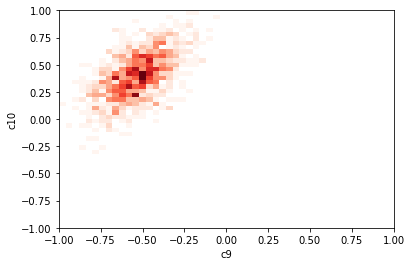

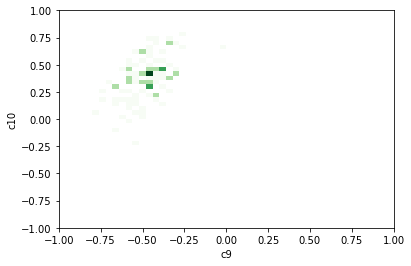

In [56]:
err.plot_2d_error(c9_predictions, c10_predictions, bins=(50,50), c_range=(-1,1), show=True)
err.plot_2d_error(c9_predictions_dense, c10_predictions_dense, bins=(50,50), c_range=(-1,1), show=True, color_map=plt.cm.Greens)

In [21]:
simple_sample

,q2,k,l,p,J_comp
0,14.498198,2.729491,0.605314,0.279665,0.688015
1,11.014711,1.692780,1.285026,-1.370453,0.530656
2,7.797051,0.921580,2.590832,-2.612348,0.129048
3,18.274971,2.735215,1.300263,-0.440819,0.790924
4,10.757946,0.454165,1.908450,1.632341,0.712921
...,...,...,...,...,...
13405,7.774642,2.259719,1.196106,-1.164047,0.854056
13406,7.688215,2.382730,1.735567,-0.349380,0.949713
13407,17.202778,1.111543,2.504270,0.923849,0.246355
13408,11.004992,1.389056,0.488533,-2.240746,1.000228


<ipython-input-50-6d93084dfe1f>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


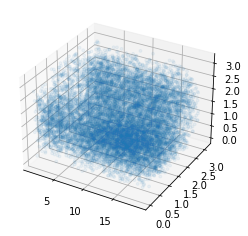

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax.scatter(x, y, x + y ** 2)
ax.scatter(*simple_sample[['q2','k','l']].values.T, s=8,alpha=0.06)

fig.show()